In [704]:
# importing modules
import numpy as np
import pandas as pd         # dataframe 용이

# umport python lib for visulization
import matplotlib.pyplot as plt
# 노트북 페이지에 바로 그래프 나오게 
%matplotlib inline    
import seaborn as sns
plt.style.use('seaborn')    # matplot의 기본 scheme 대신 seaborn scheme로 세팅 
sns.set(font_scale=2.5)     # seaborn의 font_scale 로 글씨 크기 통일

# import missingno as msno    # null값 확인에 용의
import warnings    # ignore warnings
warnings.filterwarnings('ignore')

In [705]:
# checking current working directory
import os
os.getcwd()

'C:\\Users\\USER\\Documents\\Github\\2019-1-winter-BOAZ\\PYTHON\\Untitled Folder'

In [706]:
# ../하위폴더명
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')
# 원데이터 복사
df_train = train
df_test = test

train_test_data = [train, test] # combining train and test dataset

In [707]:
sns.set()
# feature에 따른 생존여부 함수 정의
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))

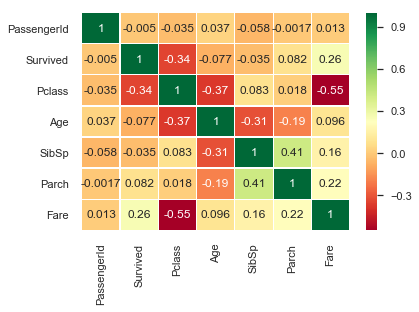

In [708]:
sns.heatmap(train.corr(), annot=True, cmap='RdYlGn', linewidth=0.2)
fig = plt.gcf()
fig.set_size_inches(6,4)
plt.show()


### FEATURE ENGINEERING




#### Name 

In [709]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [710]:


train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Capt          1
Don           1
Sir           1
Lady          1
Jonkheer      1
Countess      1
Mme           1
Name: Title, dtype: int64

In [711]:
pd.crosstab(train.Title, train.Sex).T.style.background_gradient(cmap='summer_r')

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [712]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [713]:
pd.crosstab(train.Title, train.Survived).T.style.background_gradient(cmap='summer_r')

Title,0,1,2,3
Survived,,,,
0,436,55,26,32
1,81,127,99,35


In [714]:
# delete unnecessary feature from dataset
# drop - axis, inplace
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

#### Sex

In [715]:
pd.crosstab([train.Sex, train.Survived], train.Pclass, margins=True).style.background_gradient(cmap='summer_r')

- Pclass가 3인 남성, Pclass가 1인 여성

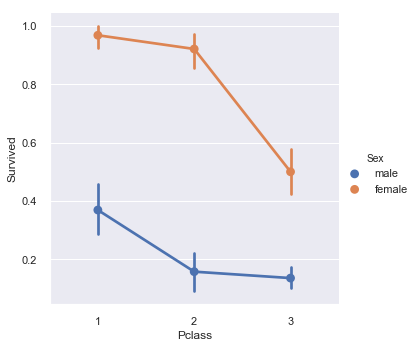

In [716]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=train)
plt.show()

- %로 봤을 때의 그래프, Pclass Sex 모두 중요한 feature

In [717]:
sex_mapping={'male':0, 'female':1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

#### Age

In [718]:
for dataset in train_test_data:
    dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)

In [719]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
label = LabelEncoder()
for dataset in train_test_data:
    dataset['Age'] = label.fit_transform(dataset['AgeBin'])

In [720]:
train.Age.value_counts()

1    525
2    186
0    100
3     69
4     11
Name: Age, dtype: int64

In [721]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBin
0,1,0,3,0,1,1,0,A/5 21171,7.2500,NaN,S,0,"(16.0, 32.0]"
1,2,1,1,1,2,1,0,PC 17599,71.2833,C85,C,2,"(32.0, 48.0]"
2,3,1,3,1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,1,"(16.0, 32.0]"
3,4,1,1,1,2,1,0,113803,53.1000,C123,S,2,"(32.0, 48.0]"
4,5,0,3,0,2,0,0,373450,8.0500,NaN,S,0,"(32.0, 48.0]"


In [722]:
pd.crosstab(train.Age, train.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Age,,,
0,45,55,100
1,344,181,525
2,111,75,186
3,39,30,69
4,10,1,11
All,549,342,891


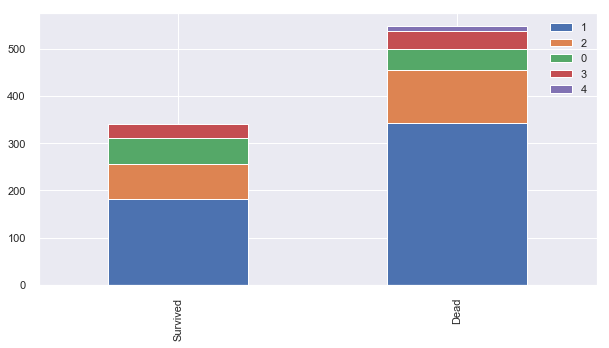

In [723]:
bar_chart('Age')

#### Embarked

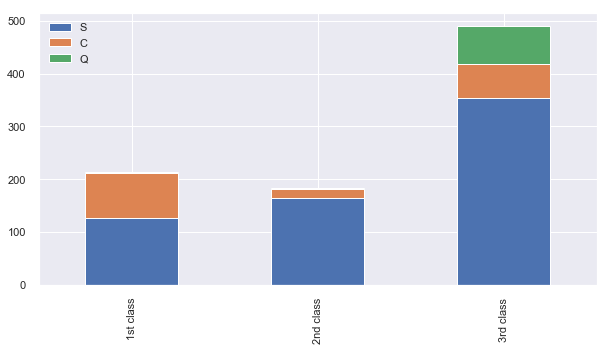

In [724]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

- Q - 1등급에 거의 없다
- S - 모든 클래스의 50% 이상 -> embark가 missing인 경우 S로 써도 무방하다
more than 50% of 1st class are from S embark
more than 50% of 2nd class are from S embark
more than 50% of 3rd class are from S embark

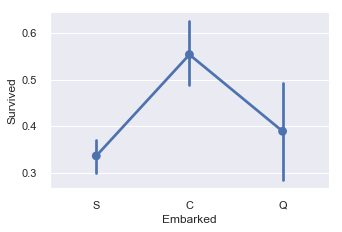

In [725]:
sns.factorplot('Embarked', 'Survived', data=train)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

- 1st에 C와 S 집중되어있는데 C에서 탑승한사람 생존 확률 50%이상

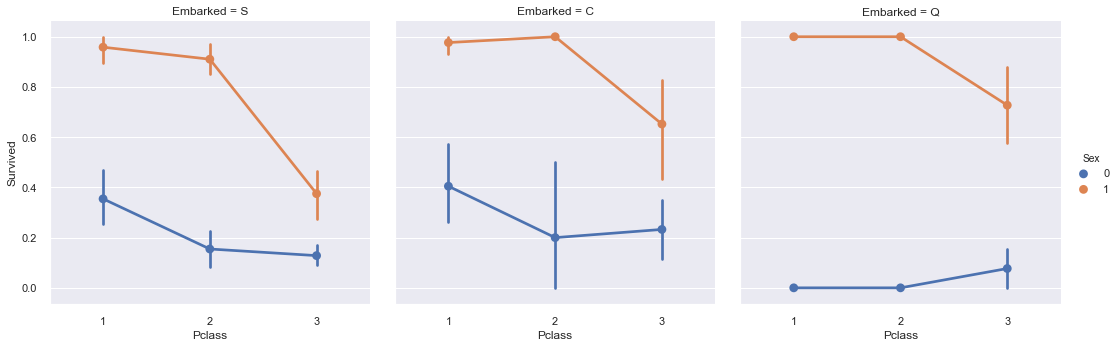

In [726]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col= 'Embarked', data=train)
plt.show()

- S + 3rd class 생존 확률 매우 낮음

In [727]:
train.Embarked.isnull().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

In [728]:
# convert to numeric
# complete embarked with mode
embarked_mapping = {'S':0, 'C':1, 'Q':2}
for dataset in train_test_data:
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

#### Fare

(0.0, 512.3292)

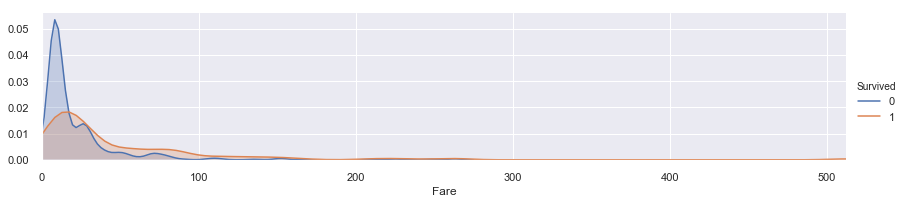

In [729]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim()

In [730]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [731]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [732]:
for dataset in train_test_data:
    dataset['CategoricalFare'] = pd.qcut(dataset['Fare'], 4)
print (train[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean())

   CategoricalFare  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [733]:
label = LabelEncoder()
for dataset in train_test_data:
    dataset['Fare'] = label.fit_transform(dataset['CategoricalFare'])

In [734]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBin,CategoricalFare
0,1,0,3,0,1,1,0,A/5 21171,0,NaN,0,0,"(16.0, 32.0]","(-0.001, 7.91]"
1,2,1,1,1,2,1,0,PC 17599,3,C85,1,2,"(32.0, 48.0]","(31.0, 512.329]"
2,3,1,3,1,1,0,0,STON/O2. 3101282,1,NaN,0,1,"(16.0, 32.0]","(7.91, 14.454]"
3,4,1,1,1,2,1,0,113803,3,C123,0,2,"(32.0, 48.0]","(31.0, 512.329]"
4,5,0,3,0,2,0,0,373450,1,NaN,0,0,"(32.0, 48.0]","(7.91, 14.454]"


#### Cabin

In [735]:
train.Cabin.isnull().sum()    # missing이 너무 많다..

687

#### FamilySize

In [736]:
# 배에 혼자 탔는지, 가족과 함께 탔는지가 중요하므로 하나의 변수로 만들자
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [737]:
for dataset in train_test_data:
    dataset['IsAlone'] = 1    # alone=1
    dataset.loc[dataset['FamilySize']>1, 'IsAlone']= 0
print(train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


(0, 11.0)

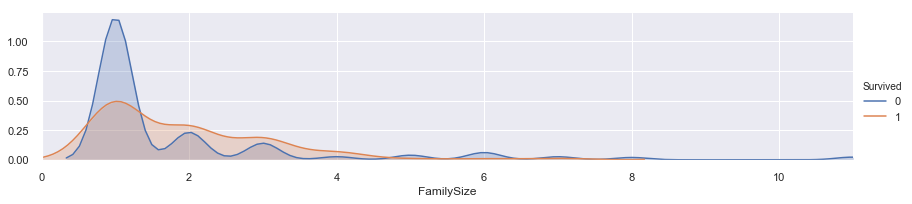

In [738]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [739]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [740]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBin,CategoricalFare,FamilySize,IsAlone
0,1,0,3,0,1,1,0,A/5 21171,0,NaN,0,0,"(16.0, 32.0]","(-0.001, 7.91]",0.4,0
1,2,1,1,1,2,1,0,PC 17599,3,C85,1,2,"(32.0, 48.0]","(31.0, 512.329]",0.4,0
2,3,1,3,1,1,0,0,STON/O2. 3101282,1,NaN,0,1,"(16.0, 32.0]","(7.91, 14.454]",0.0,1
3,4,1,1,1,2,1,0,113803,3,C123,0,2,"(32.0, 48.0]","(31.0, 512.329]",0.4,0
4,5,0,3,0,2,0,0,373450,1,NaN,0,0,"(32.0, 48.0]","(7.91, 14.454]",0.0,1


In [741]:
features_drop = ['Ticket', 'SibSp', 'Parch', 'FamilySize','Cabin']
train = train.drop(features_drop, axis=1)
train = train.drop(['AgeBin','CategoricalFare'], axis=1)
test = test.drop(features_drop, axis=1)

In [742]:
target = train['Survived']
train_data = train.drop(['PassengerId', 'Survived'], axis=1)
train_data.shape, target.shape

((891, 7), (891,))

In [743]:
# 숫자로 구성된 feature 벡터 가지고 있으면 ML 가능
train_data.head()

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,3,0,1,0,0,0,0
1,1,1,2,3,1,2,0
2,3,1,1,1,0,1,1
3,1,1,2,3,0,2,0
4,3,0,2,1,0,0,1


In [744]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Modelling

In [745]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null int32
Fare        891 non-null int32
Embarked    891 non-null int64
Title       891 non-null int64
IsAlone     891 non-null int64
dtypes: int32(2), int64(5)
memory usage: 41.8 KB


In [746]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [747]:
#importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import numpy as np

## cross validation(k-fold)

In [748]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

### kNN

In [749]:
max_k_range = train.shape[0] // 2
k_list=[]
for i in range(3, max_k_range,2):
    k_list.append(i)
    
cross_validation_scores = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, train_data, train['Survived'].values.ravel(),
                             cv=10, scoring='accuracy')
    cross_validation_scores.append(scores.mean())

cross_validation_scores

[0.7913188060379073,
 0.7947023606855067,
 0.8014061967994552,
 0.7969367835659971,
 0.7958506412438997,
 0.8081352854386562,
 0.8058753262966747,
 0.7946515718987628,
 0.7901818749290659,
 0.7935149245261605,
 0.7979715696288731,
 0.7890330268981953,
 0.784525876744978,
 0.7968981954375212,
 0.7935529451821586,
 0.7969115310407444,
 0.7969112473045057,
 0.7935030076041312,
 0.7924293496765407,
 0.7846141187152422,
 0.7823918964930201,
 0.7857882192713653,
 0.774551696742708,
 0.775675292248326,
 0.7734405856315968,
 0.7689331517421405,
 0.7712189308818522,
 0.7723550107819771,
 0.774602201793213,
 0.7745897173987062,
 0.773478606287595,
 0.7712314152763591,
 0.7757257972988311,
 0.7722920213369651,
 0.7711681420951084,
 0.7779480195210533,
 0.7757257972988311,
 0.7723172738622177,
 0.7712189308818522,
 0.7745772330041993,
 0.7757008285098173,
 0.7734661218930883,
 0.7768369084099421,
 0.7745897173987062,
 0.7745897173987062,
 0.7734533537623425,
 0.7712186471456134,
 0.772367495176484

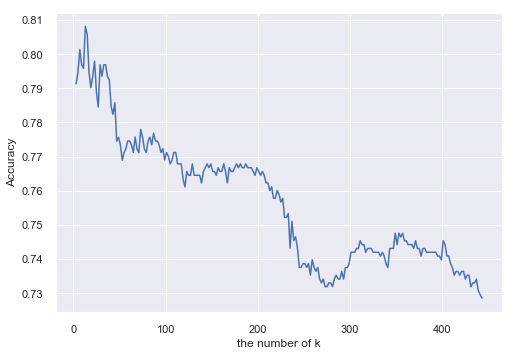

In [750]:
# visualize accuracy according to k
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [751]:
# find best k
cvs = cross_validation_scores
k = k_list[cvs.index(max(cross_validation_scores))]
print("The best number of k : " + str(k) )

The best number of k : 13


In [752]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.79775281 0.79775281 0.83146067 0.82022472 0.84269663
 0.82022472 0.78651685 0.83146067 0.79775281]


In [753]:
# kNN Score
round(np.mean(score)*100, 2)

81.37

### DecisionTree

In [754]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.83146067 0.76404494 0.78651685 0.88764045 0.78651685
 0.83146067 0.78651685 0.80898876 0.80898876]


In [755]:
# decision tree Score
round(np.mean(score)*100, 2)

80.92

In [756]:
xyz=[]
accuracy=[]
std=[]
classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Regression', 'kNN', 'Decision Tree',
              'Naive Bayes', 'Random Forest']
models = []

### RandomForestClassifier

In [757]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.77777778 0.82022472 0.78651685 0.7752809  0.88764045 0.79775281
 0.84269663 0.79775281 0.78651685 0.80898876]


In [758]:
# Random Forest Score
round(np.mean(score)*100, 2)

80.81

### NaiveBayes

In [759]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76666667 0.74157303 0.7752809  0.74157303 0.76404494 0.79775281
 0.76404494 0.7752809  0.79775281 0.83146067]


In [760]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

77.55

### SVM

In [761]:
from sklearn.model_selection import GridSearchCV
def svc_param_selection(X, y, nfolds):
    svm_parameters = [
                        {'kernel': ['rbf'],
                         'gamma': [0.00001,0.0001, 0.001, 0.01, 0.1, 1],
                         'C': [0.01, 0.1, 1, 10, 100, 1000]
                        }
                       ]
    
    clf = GridSearchCV(SVC(), svm_parameters, cv=10)
    clf.fit(train_data, train['Survived'].values.ravel())
    print(clf.best_params_)
    
    return clf

In [762]:
clf = svc_param_selection(train_data, train['Survived'].values.ravel(), 10)

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}


In [763]:
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=4, scoring=scoring)
print(score)

[0.8        0.82022472 0.79775281 0.78651685 0.87640449 0.79775281
 0.80898876 0.80898876 0.79775281 0.82022472]


In [764]:
round(np.mean(score)*100,2)

81.15

In [765]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,0,1,0,0,0,0
1,2,1,1,1,2,3,1,2,0
2,3,1,3,1,1,1,0,1,1
3,4,1,1,1,2,3,0,2,0
4,5,0,3,0,2,1,0,0,1


In [766]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

TypeError: float() argument must be a string or a number, not 'pandas._libs.interval.Interval'

In [ ]:
test_data.isnull().sum()

In [ ]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

In [ ]:
submission.head()